In [7]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
Consumer_Key = "ZEbvo5R71sBD6PN0FBcnGYKBB"
Consumer_Secret_Key = "Z8bsua2ny8OxIFYlP6Y4sZvcI0BTrksbmTjYzCMMi01fAmzXV9" 
Access_Token = "1205070840666062848-6SZ0wxWZsnKwJDp5u5yL07CvHwV20R"
Access_Token_Secret = "mstyDF9xMZY0Iv1Znta3GWuNrYOTYXNjyEcKxffMwULIx"

In [8]:
auth = tweepy.OAuthHandler(Consumer_Key,Consumer_Secret_Key)
auth.set_access_token(Access_Token,Access_Token_Secret)
api = tweepy.API(auth)

In [11]:
posts = api.user_timeline(screen_name="g20org", count = 1000, lang = "en", tweet_mode = "extended")

print("Show the 10 recent tweets: \n")
i=1
for tweet in posts[:10]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i=i+1

Show the 10 recent tweets: 

1) The results and policy recommendations of all G20 meetings will be brought to the Heads of State and Government at the G20 Summit.


Stay tuned on @g20org for more updates regarding G20 meetings and events. 
#G20Indonesia #RecoverTogetherRecoverStronger https://t.co/nCDE5kvZW1

2) In November, several meetings on the ministerial levels and summits of G20 engagement groups will be held prior to the holding of the G20 Leaders' Summit which will be held on 15-16 November 2022.
#G20Indonesia #RecoverTogetherRecoverStronger https://t.co/8CWlZhdvWN

3) HMM is expected to adopt a consensus between G20 countries on the health issues the world is currently facing, as well as plans of action to prepare the world for the next future pandemic.
#G20Indonesia #RecoverTogetherRecoverStronger

4) Side Events of Health Working Group (HWG) meetings involved non-government institutions in discussing global health issues on tuberculosis, one health, and antimicrobial resist

In [12]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
df.head()

,Tweets
0,The results and policy recommendations of all ...
1,"In November, several meetings on the ministeri..."
2,HMM is expected to adopt a consensus between G...
3,Side Events of Health Working Group (HWG) meet...
4,5. redistributing resources and development ca...


In [13]:
def cleanTxt(text):
  text = re.sub('@[A-Za-z0-9]+', '', text)
  text = re.sub('#', '', text)
  text = re.sub('RT[\s]+', '', text)
  text = re.sub('https?:\/\/\S+', '', text)

  return text

df['Tweets'] = df['Tweets'].apply(cleanTxt)

df

,Tweets
0,The results and policy recommendations of all ...
1,"In November, several meetings on the ministeri..."
2,HMM is expected to adopt a consensus between G...
3,Side Events of Health Working Group (HWG) meet...
4,5. redistributing resources and development ca...
...,...
195,The Indonesian Minister of National Developmen...
196,During the series of G20 Development Ministeri...
197,and the “G20 Principles to Scale up Blended Fi...
198,The Ministerial Meeting produced 2 outcome doc...


In [14]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df

,Tweets,Subjectivity,Polarity
0,The results and policy recommendations of all ...,0.500000,0.500000
1,"In November, several meetings on the ministeri...",0.000000,0.000000
2,HMM is expected to adopt a consensus between G...,0.205000,0.000000
3,Side Events of Health Working Group (HWG) meet...,0.200000,-0.050000
4,5. redistributing resources and development ca...,0.166667,0.000000
...,...,...,...
195,The Indonesian Minister of National Developmen...,0.750000,0.375000
196,During the series of G20 Development Ministeri...,0.166667,0.083333
197,and the “G20 Principles to Scale up Blended Fi...,0.000000,0.000000
198,The Ministerial Meeting produced 2 outcome doc...,0.366667,-0.150000


<function matplotlib.pyplot.show(*args, **kw)>

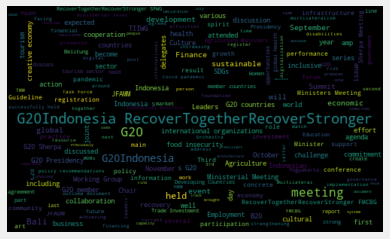

In [15]:
allwords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=10, max_font_size=110).generate(allwords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show

In [16]:
def getAnalysis(score):

  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,The results and policy recommendations of all ...,0.500000,0.500000,Positive
1,"In November, several meetings on the ministeri...",0.000000,0.000000,Neutral
2,HMM is expected to adopt a consensus between G...,0.205000,0.000000,Neutral
3,Side Events of Health Working Group (HWG) meet...,0.200000,-0.050000,Negative
4,5. redistributing resources and development ca...,0.166667,0.000000,Neutral
...,...,...,...,...
195,The Indonesian Minister of National Developmen...,0.750000,0.375000,Positive
196,During the series of G20 Development Ministeri...,0.166667,0.083333,Positive
197,and the “G20 Principles to Scale up Blended Fi...,0.000000,0.000000,Neutral
198,The Ministerial Meeting produced 2 outcome doc...,0.366667,-0.150000,Negative


In [17]:
print('Printing negative tweets:\n')
j=i
sortedDF = df.sort_values(by=['Polarity'],ascending=False)
for i in range(0,sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

11) Side Events of Health Working Group (HWG) meetings involved non-government institutions in discussing global health issues on tuberculosis, one health, and antimicrobial resistance. Each of these topics is expected to produce an outcome.
G20Indonesia

12) The 2nd Health Ministers Meeting is the finalization of the entire Health Working Group (HWG) and Health Ministerial Meeting (HMM) series that has been carried out previously. 

This meeting is expected to produce an outcome document to strengthen the global health architecture. 

13) Here are the terms commonly used in the G20. 
G20Indonesia RecoverTogetherRecoverStronger 

14) which further impacted the vulnerable group, especially low-income and developing countries.
G20Indonesia RecoverTogetherRecoverStronger FMCBG

15) The IMF’s World Economic Outlook has also confirmed bleak prospects and mounting risks. The reliance of these countries on MDBs’ support becomes increasingly critical, and there is an

In [18]:
print('Printing positive tweets:\n')
j=i
sortedDF = df.sort_values(by=['Polarity'],ascending=True)
for i in range(0,sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing positive tweets:

199) The results and policy recommendations of all G20 meetings will be brought to the Heads of State and Government at the G20 Summit.


Stay tuned on  for more updates regarding G20 meetings and events. 
G20Indonesia RecoverTogetherRecoverStronger 

200) 1. establishing a fund for the future which was successfully done in June and July
2. establishing a formal mechanism on how we can use this fund to give equitable access to emergency medical countermeasures which are vaccines, therapeutics, and diagnostic tools  
G20Indonesia

201) Press Conference 

G20 2nd Health Ministers Meeting (HMM)
Bali, 27 October 2022

5 ambitious deliverables that Indonesia’s G20 Presidency would like to achieve, which became the main discussions during the previous Health Working Group (HWG) meetings:
G20Indonesia 

202) Find out more about G20 and this year’s G20 Presidency through this post. 
G20Indonesia RecoverTogetherRecoverStronger 

203) The G20 Summit 2022 is coming in l

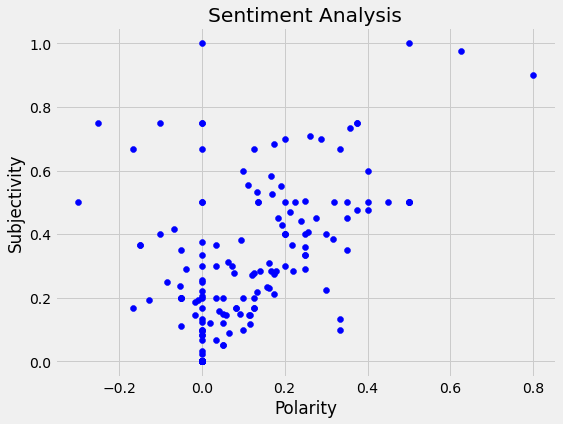

In [19]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()